<a href="https://colab.research.google.com/github/diro5t/deep_quadric_learning/blob/main/TorchLinMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(c) Dirk Roeckmann 2023

Simple PyTorch MNIST classifier model with linear layers: 784X128, 128x64, 64x10

for reference to the same task with quadric layers introduced in:

https://github.com/diro5t/deep_quadric_learning

and based on my research:

https://scholar.google.com/citations?hl=en&user=hamuGh4AAAAJ

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transf = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,)),])

In [ ]:
batch_size = 64

train_set = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transf)
test_set = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transf)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [ ]:
img_iter = iter(train_loader)
images, labels = next(img_iter)

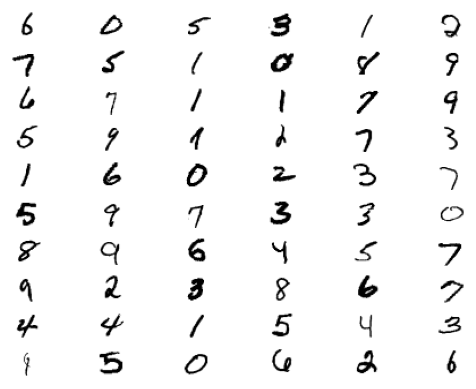

In [ ]:
figure = plt.figure()
img_num = 60
for index in range(1, img_num + 1):
    plt.subplot(10, 6, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [ ]:
loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 15
for e in range(epochs):
    train_loss = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, train_loss/len(train_loader)))

Epoch 0 - Training loss: 0.6153036111405791
Epoch 1 - Training loss: 0.27330345399916045
Epoch 2 - Training loss: 0.21305163449713035
Epoch 3 - Training loss: 0.17037465529186702
Epoch 4 - Training loss: 0.14092377192183916
Epoch 5 - Training loss: 0.12162655508959852
Epoch 6 - Training loss: 0.10447251620982438
Epoch 7 - Training loss: 0.09358849638659976
Epoch 8 - Training loss: 0.08331883211718447
Epoch 9 - Training loss: 0.07551144778992591
Epoch 10 - Training loss: 0.06920516160679167
Epoch 11 - Training loss: 0.06333149513224763
Epoch 12 - Training loss: 0.05818919493615238
Epoch 13 - Training loss: 0.054196633017514706
Epoch 14 - Training loss: 0.05046481554131351


In [ ]:
corrects, all = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.inference_mode():
        logps = model(img)
    ps = torch.exp(logps)
    prob = list(ps.numpy()[0])
    inf_label = prob.index(max(prob))
    true_label = labels.numpy()[i]
    if(true_label == inf_label):
      corrects += 1
    all += 1

print("Number of tested images=", all)
print("\nModel Accuracy =", (corrects / all))

Number of tested images= 10000

Model Accuracy = 0.9747
